In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data= pd.read_csv('/content/drive/MyDrive/extended_salary_data(1).csv')
print(data)

    YearsExperience     Salary
0               8.1   77884.67
1              19.1  127213.68
2              14.9  103343.52
3              12.4   88988.96
4               4.0   35214.78
5               4.0   42801.56
6               2.1   35893.61
7              17.5  128071.22
8              12.4   95436.18
9              14.5   84869.60
10              1.4   40240.84
11             19.4  123149.18
12             16.8  107230.78
13              5.0   61116.76
14              4.5   62810.00
15              4.5   61812.80
16              6.8   55607.82
17             11.0   81907.88
18              9.2   79312.63
19              6.5   72255.45
20             12.6   88208.26
21              3.7   46643.41
22              6.6   51936.65
23              8.0   58037.93
24              9.7   86625.26
25             15.9  123062.40
26              4.8   53279.90
27             10.8   94035.33
28             12.3   95116.36
29              1.9   33048.80
30             12.5   96113.96
31      

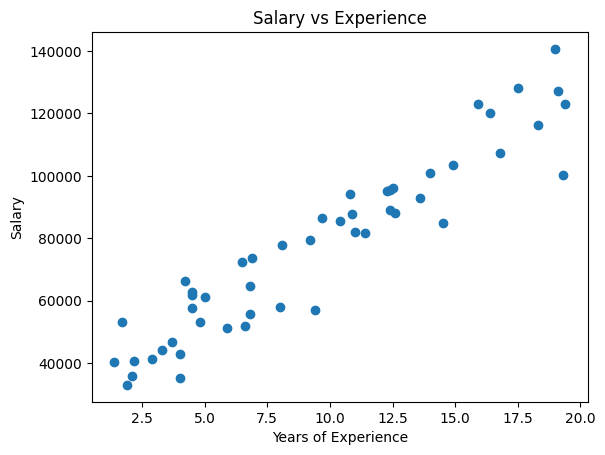

In [36]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [37]:
print("mean:", data['YearsExperience'].mean())
print("\nmedian:",data['YearsExperience'].median())
print("\nstandard deviation:",data['YearsExperience'].std())
print("\nvariance:",data['YearsExperience'].var())
print("\nmin:",data['YearsExperience'].min())
print("\nmax:",data['YearsExperience'].max())

mean: 9.48

median: 9.3

standard deviation: 5.4854910668870795

variance: 30.09061224489795

min: 1.4

max: 19.4


In [38]:
print("mean:", data['Salary'].mean())
print("\nmedian:",data['Salary'].median())
print("\nstandard deviation:",data['Salary'].std())
print("\nvariance:",data['Salary'].var())
print("\nmin:",data['Salary'].min())
print("\nmax:",data['Salary'].max())

mean: 77370.5474

median: 78598.65

standard deviation: 28298.924420163854

variance: 800829123.3381461

min: 33048.8

max: 140646.44


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['YearsExperience'], data['Salary'], test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)
acc_simplelr=lr.score(X_test.values.reshape(-1, 1), y_test)*100
print("Accuracy Percentage:", lr.score(X_test.values.reshape(-1, 1), y_test)*100)
print("Slope:", lr.coef_)
print("Intercept:", lr.intercept_)

Accuracy Percentage: 85.07908422793845
Slope: [4854.18497207]
Intercept: 31387.443404060636


In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(lr.predict(X_test.values.reshape(-1, 1)))
print("MAE:", mean_absolute_error(lr.predict(X_test.values.reshape(-1, 1)),y_test.values.reshape(-1, 1)))
print("MSE:", mean_squared_error(lr.predict(X_test.values.reshape(-1, 1)), y_test.values.reshape(-1, 1)))

[ 55658.36826439  77016.78214148  92064.75555489  97404.35902416
  84783.47809679  86725.15208561  54687.53126998 108568.98445991
  42066.65034261  62939.64572249]
MAE: 6836.210895894568
MSE: 79580620.27310547


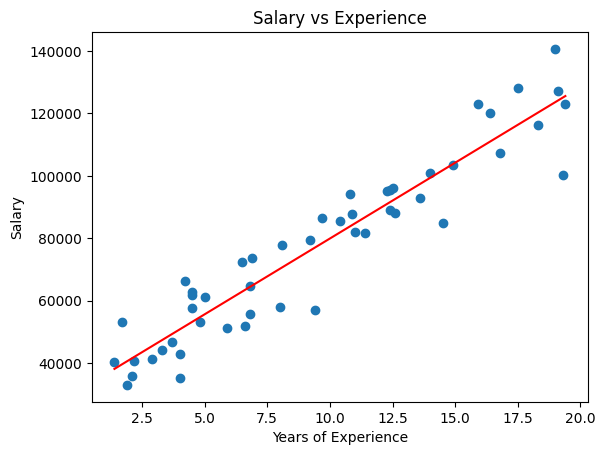

In [42]:
X_plot = np.linspace(data['YearsExperience'].min(), data['YearsExperience'].max(), 100).reshape(-1, 1)
y_plot = lr.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Regression line')
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [43]:
import random

data['NumProjectsCompleted'] = data['YearsExperience'].apply(lambda x: random.randint(int(x), 2*int(x)))
print(data)

    YearsExperience     Salary  NumProjectsCompleted
0               8.1   77884.67                    14
1              19.1  127213.68                    37
2              14.9  103343.52                    18
3              12.4   88988.96                    19
4               4.0   35214.78                     7
5               4.0   42801.56                     5
6               2.1   35893.61                     3
7              17.5  128071.22                    30
8              12.4   95436.18                    14
9              14.5   84869.60                    28
10              1.4   40240.84                     1
11             19.4  123149.18                    28
12             16.8  107230.78                    23
13              5.0   61116.76                     8
14              4.5   62810.00                     6
15              4.5   61812.80                     7
16              6.8   55607.82                    11
17             11.0   81907.88                

In [44]:
from sklearn.model_selection import train_test_split
X=data[['YearsExperience','NumProjectsCompleted']]
y=data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.values, y_train)
acc_multilr=lr.score(X_test.values, y_test)*100
print("Accuracy Percentage:", lr.score(X_test.values, y_test)*100)
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Accuracy Percentage: 84.52583878786677
Coefficients: [4605.83349597  165.71108576]
Intercept: 31524.38048410028


In [46]:
print(lr.predict(X_test.values))
print("MAE:", mean_absolute_error(lr.predict(X_test.values),y_test.values))
print("MSE:", mean_squared_error(lr.predict(X_test.values), y_test.values))

[ 55879.23665002  77139.17054685  91914.38764163  96815.09340144
  85005.63739768  87013.68188182  54958.06995083 107905.64369945
  41988.63634675  62622.27580822]
MAE: 6950.865572604266
MSE: 82531351.71323666


In [47]:
print("Simple Linear Regression Accuracy:", acc_simplelr)
print("Multiple Linear Regression Accuracy:", acc_multilr)
if acc_simplelr>acc_multilr:
  print("Simple Linear Regression is better than Multiple Linear Regression")
else:
  print("Multiple Linear Regression is better than Simple Linear Regression")

Simple Linear Regression Accuracy: 85.07908422793845
Multiple Linear Regression Accuracy: 84.52583878786677
Simple Linear Regression is better than Multiple Linear Regression
